In [2]:
import torch
print(torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


2.7.1+cu118
CUDA Available: True
Device: NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
import pandas as pd
import os


In [4]:
# CSV file 
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"

df = pd.read_csv(csv_path)

print("Loaded CSV with rows:", len(df))
df.head()


Loaded CSV with rows: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [5]:

image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"


df['exists'] = df['filename'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))


print("Matched image files:", df['exists'].sum(), "/", len(df))


df = df[df['exists']].copy()
df = df[['filename', 'label']]
df.head()


Matched image files: 84 / 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [6]:
final_csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
df.to_csv(final_csv_path, index=False)
print("Final verified labels saved at:", final_csv_path)


Final verified labels saved at: C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv


In [7]:
print(f" TASK 1 COMPLETE: {len(df)} image-label pairs are verified and ready.")
df.sample(5)


 TASK 1 COMPLETE: 84 image-label pairs are verified and ready.


,filename,label
81,IMG_20220629_09248801.jpg,0
10,IMG_20220413_09235637.jpg,0
65,IMG_20220610_09245314.jpg,0
27,IMG_20220421_09236603.jpg,1
14,IMG_20220414_09235802.jpg,0


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [9]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"

df = pd.read_csv(csv_path)

print(f"Total samples: {len(df)}")
df.head()


Total samples: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [10]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
df = pd.read_csv(csv_path)

print(df.head())                    # View top rows
print(df['label'].unique())         # Check unique label values
print(df['label'].value_counts())   # Count how many of each class


                    filename label
0    IMG_20220411_106246.jpg     1
1    IMG_20220411_106256.jpg     0
2    IMG_20220411_106258.jpg     0
3  IMG_20220411_09235385.jpg     0
4  IMG_20220411_09235389.jpg     0
['1' '0' 'result not found']
label
0                   66
1                   16
result not found     2
Name: count, dtype: int64


In [11]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

# Input paths
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"
output_dir = os.path.join(image_dir, "augmented")
os.makedirs(output_dir, exist_ok=True)

# Load CSV and keep only COVID-positive rows
df = pd.read_csv(csv_path)
df = df[df['label'].isin(['0', '1'])]     # Remove bad rows like 'result not found'
positive_df = df[df['label'] == '1']      # Correct way to select COVID-positive rows

print(f" Found {len(positive_df)} COVID-positive images to augment.")

# Image augmentor
augmentor = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Settings
AUG_PER_IMAGE = 5
augmented_entries = []

# Process positive images only
for _, row in positive_df.iterrows():
    img_path = os.path.join(image_dir, row['filename'])
    base_name = os.path.splitext(os.path.basename(row['filename']))[0]

    if not os.path.exists(img_path):
        print(f" File not found: {img_path}")
        continue

    try:
        img = load_img(img_path)
        x = img_to_array(img).reshape((1,) + img.size + (3,))  # Ensure shape is (1, height, width, 3)

        for i, batch in enumerate(augmentor.flow(x, batch_size=1)):
            aug_filename = f"{base_name}_aug_{i}.jpg"
            aug_path = os.path.join(output_dir, aug_filename)
            save_img(aug_path, batch[0])

            # Store label 1 for each augmented file
            augmented_entries.append({'filename': os.path.join('augmented', aug_filename), 'label': 1})
            print(f"Saved augmented image: {aug_filename}")

            if i + 1 >= AUG_PER_IMAGE:
                break

    except Exception as e:
        print(f" Error processing {img_path}: {e}")

# Save new CSV with only augmented entries
augmented_df = pd.DataFrame(augmented_entries)
output_csv = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels_augmented.csv"
augmented_df.to_csv(output_csv, index=False)
print(f" Saved new CSV with only augmented positives: {output_csv}")


 Found 16 COVID-positive images to augment.
Saved augmented image: IMG_20220411_106246_aug_0.jpg
Saved augmented image: IMG_20220411_106246_aug_1.jpg
Saved augmented image: IMG_20220411_106246_aug_2.jpg
Saved augmented image: IMG_20220411_106246_aug_3.jpg
Saved augmented image: IMG_20220411_106246_aug_4.jpg
Saved augmented image: IMG_20220413_09235579_aug_0.jpg
Saved augmented image: IMG_20220413_09235579_aug_1.jpg
Saved augmented image: IMG_20220413_09235579_aug_2.jpg
Saved augmented image: IMG_20220413_09235579_aug_3.jpg
Saved augmented image: IMG_20220413_09235579_aug_4.jpg
Saved augmented image: IMG_20220413_09235624_aug_0.jpg
Saved augmented image: IMG_20220413_09235624_aug_1.jpg
Saved augmented image: IMG_20220413_09235624_aug_2.jpg
Saved augmented image: IMG_20220413_09235624_aug_3.jpg
Saved augmented image: IMG_20220413_09235624_aug_4.jpg
Saved augmented image: IMG_20220413_09235641_aug_0.jpg
Saved augmented image: IMG_20220413_09235641_aug_1.jpg
Saved augmented image: IMG_2022

In [12]:
import pandas as pd

# Load original and augmented CSVs
original_df = pd.read_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels.csv")
augmented_df = pd.read_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels_augmented.csv")

# Merge both dataframes
merged_df = pd.concat([original_df, augmented_df], ignore_index=True)

# Convert labels to string for safe filtering
merged_df['label'] = merged_df['label'].astype(str)

# Keep only valid labels '0' and '1'
merged_df = merged_df[merged_df['label'].isin(['0', '1'])]

# Convert back to integers
merged_df['label'] = merged_df['label'].astype(int)

# Shuffle the merged dataframe
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to disk
merged_df.to_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv", index=False)

# Print final label distribution
print("Final label distribution:")
print(merged_df['label'].value_counts())


Final label distribution:
label
1    96
0    66
Name: count, dtype: int64


ConvNext-T Implementation

In [13]:
### 📦 Phase 1: Data Preparation and Augmentation Setup

import pandas as pd
import os
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the cleaned merged CSV
csv_path = r"C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv"
df = pd.read_csv(csv_path)

# Confirm label balance
print("Label distribution:")
print(df['label'].value_counts())

# Define base directory for images
image_dir = r"C:/Users/ajith/OneDrive/Desktop/Dissertation/dataset/content/dataset"

# Add full path to filenames for Keras generator
df['filepath'] = df['filename'].apply(lambda x: os.path.join(image_dir, x.replace('\\', '/')))



Label distribution:
label
1    96
0    66
Name: count, dtype: int64


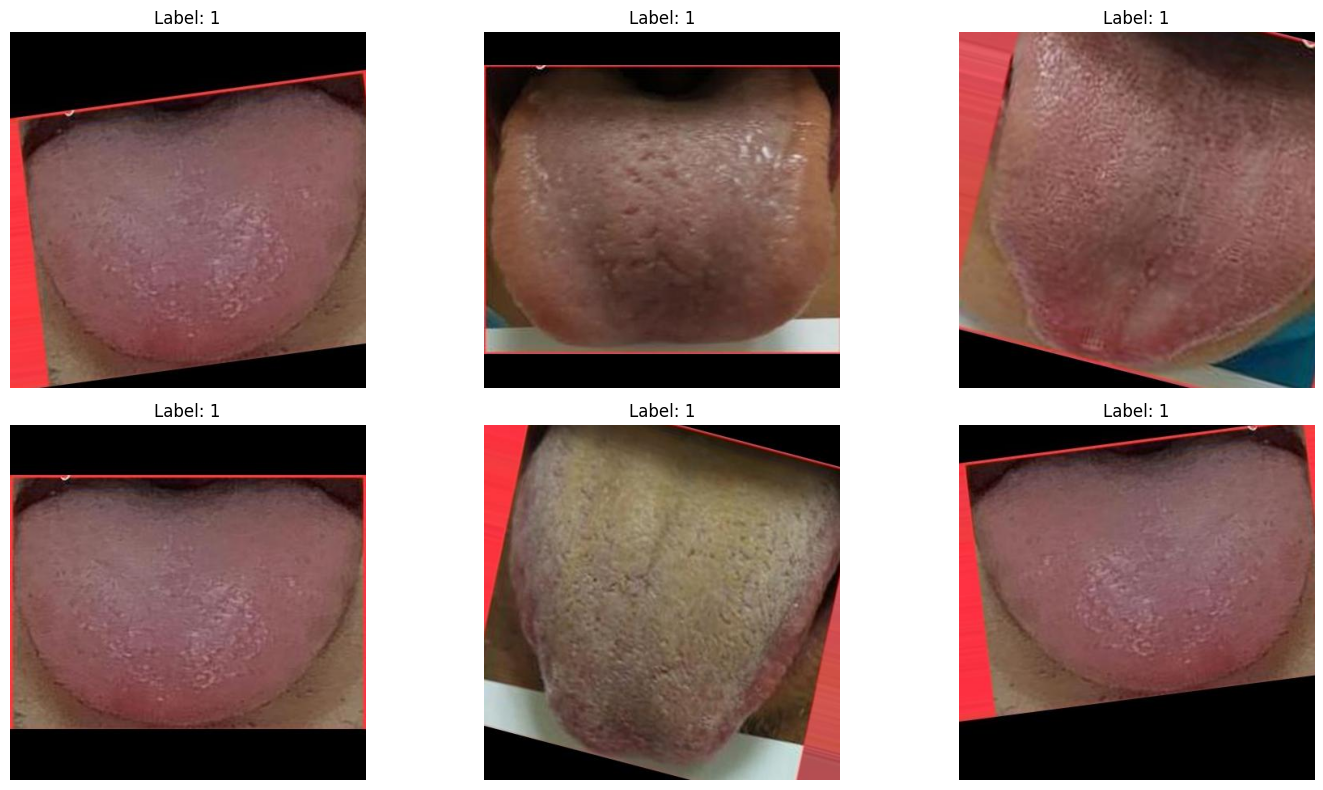

In [14]:
# Show a few sample images with their labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_df = df.sample(6, random_state=42).reset_index(drop=True)

plt.figure(figsize=(15, 8))
for i in range(len(sample_df)):
    img = mpimg.imread(sample_df['filepath'][i])
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {sample_df['label'][i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
